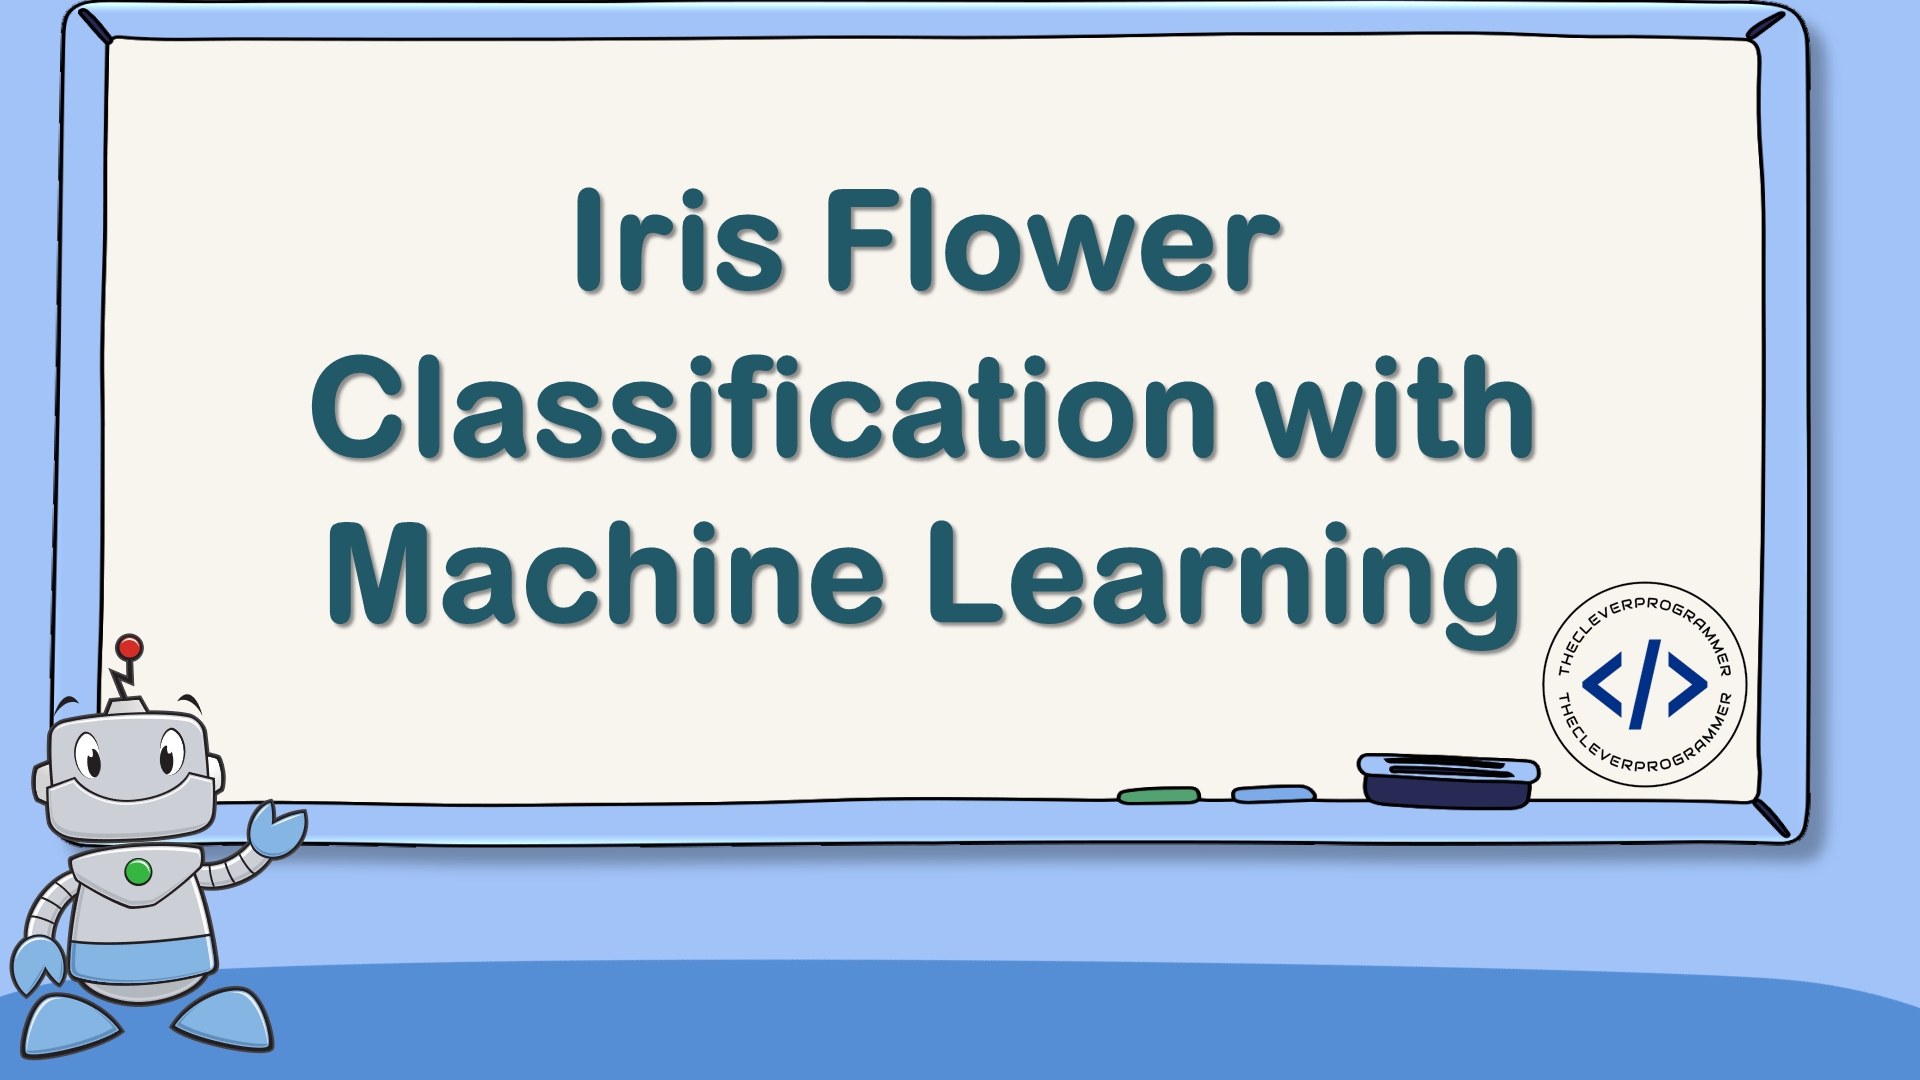


#APPROACH

---




1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values: impute all missing values using Mean,Median and Mode
      2. Inconistent values: Replace all inconsistence with consistent values
      3. Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis
      2. Bi-Varient Analysis
      3. Multi-Varient Analysis
          1. Classification Problem
          2. Apply Machine Learing Models
          3. Compare and bring out the best Model
       


# IMPORTING ALL THE LIBRARIES
---


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv("/content/Iris.csv")

In [ ]:
df.head(7).style.background_gradient(cmap='Reds')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa
5,6,5.400000,3.900000,1.700000,0.400000,Iris-setosa
6,7,4.600000,3.400000,1.400000,0.300000,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There is only 1 column in object datatype.

In [ ]:
print('No of Columns:',df.shape[1])
print('No of Rows:',df.shape[0])

No of Columns: 6
No of Rows: 150


In [ ]:
# Univarient Analysis

df.describe().style.background_gradient(cmap='Oranges')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Checking the missing value

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing value, Data is clean.



---



In [ ]:
# Checking the skewness of the data

df.skew()

<ipython-input-20-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

# DATA MANIPULATION

---



In [ ]:
# Drop the 'Id' column as it's not needed for the classification

df = df.drop(columns=["Id"])

In [ ]:
#Displaying the modified data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# DATA VISUALISATION

---



<ipython-input-31-6be4e8974572>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap="crest")


<Axes: >

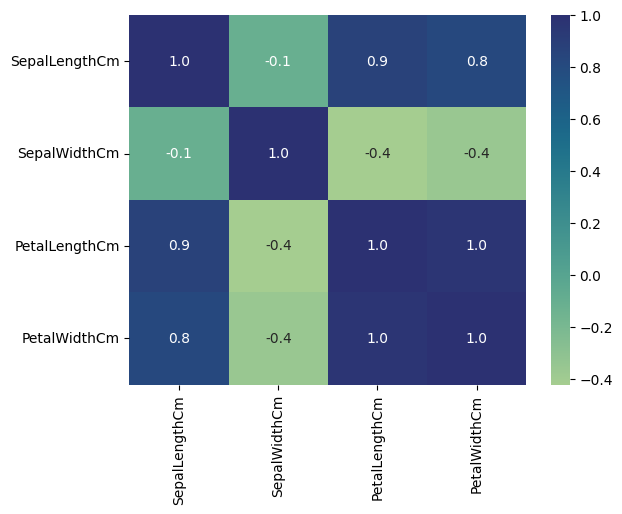

In [ ]:
# Visualising the correlation

sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap="crest")

In [ ]:
# Count of the species

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: title={'center': 'Target Class Distribution'}, ylabel='Species'>

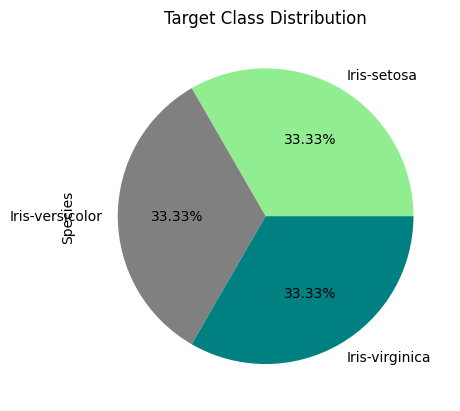

In [ ]:
# Distribution of Target variable

plt.title('Target Class Distribution')
df['Species'].value_counts().plot(kind='pie',autopct='%0.2f%%',colors=['lightgreen','grey','teal'])

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

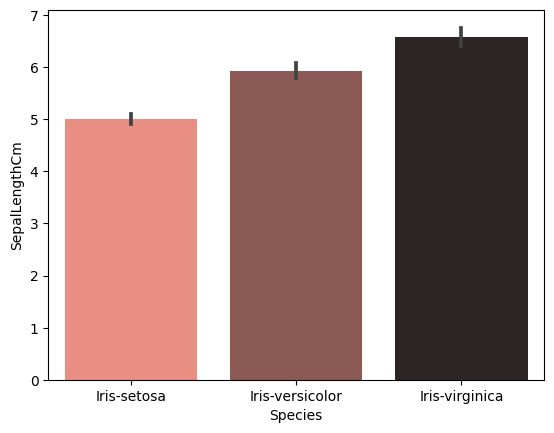

In [ ]:
# Visualize Species VS Sepal LengthCm

sns.barplot(data=df, x='Species', y='SepalLengthCm', palette='dark:salmon_r')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

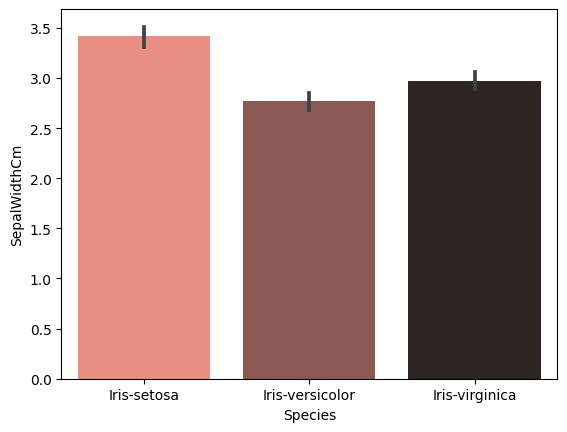

In [63]:
# Visualize Species VS Sepal WidthCm

sns.barplot(data=df, x='Species', y='SepalWidthCm', palette='dark:salmon_r')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

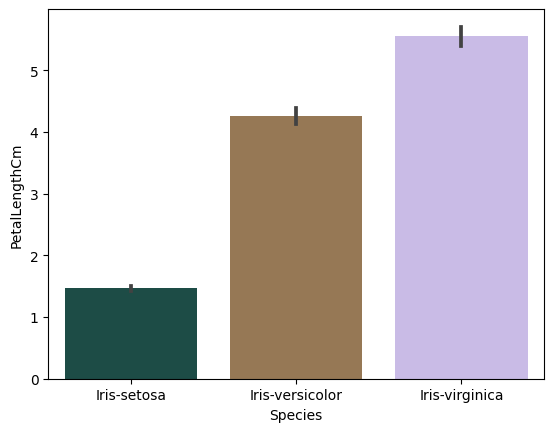

In [57]:
# Visualize Species VS Petal LengthCm

sns.barplot(data=df, x='Species', y='PetalLengthCm', palette='cubehelix')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

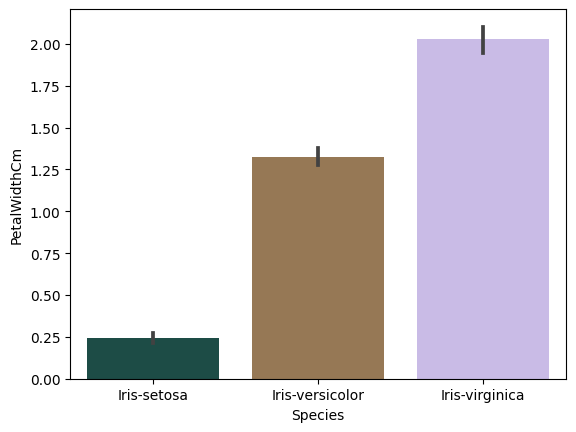

In [60]:
# Visualize Species VS Petal WidthCm

sns.barplot(data=df, x='Species', y='PetalWidthCm', palette='cubehelix')

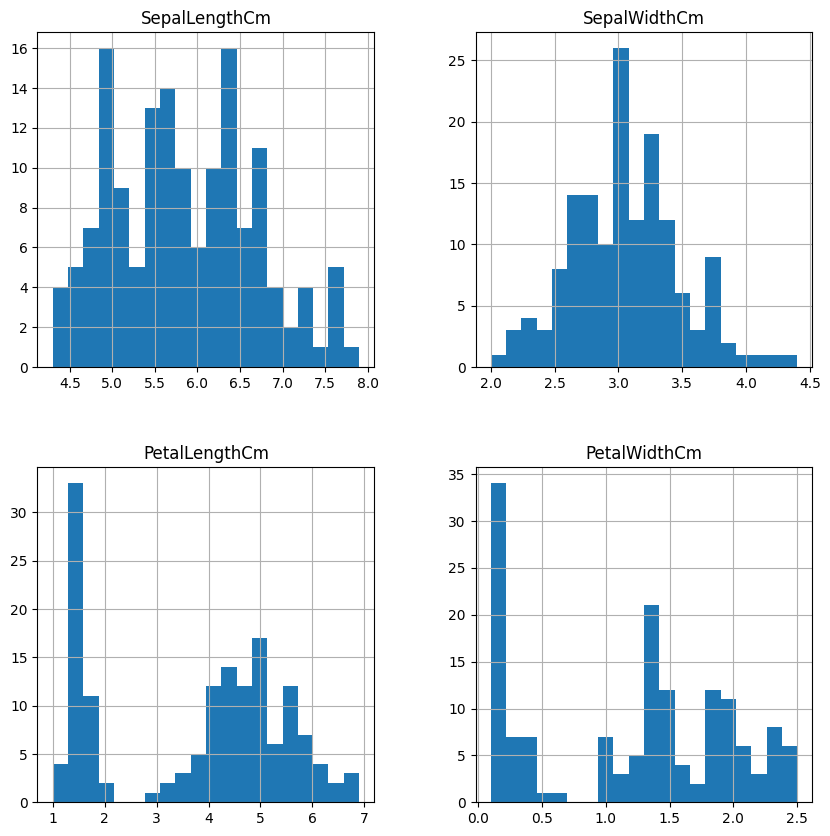

In [59]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

# SPLITTING TRAIN AND TEST DATA

---



In [64]:
# Feature Variable
x=df.drop(['Species'],axis=1)

#Target Variable
y=df['Species']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# BUILDING MODEL

---



##  LOGISTIC REGRESSION

---



In [71]:
lr = LogisticRegression(max_iter=1000)

lr.fit(x_train, y_train)

lr_preds_train = lr.predict(x_train)
lr_preds_test = lr.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, lr_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, lr_preds_test),2))

Train accuracy score of the model is:  0.98
Test accuracy score of the model is:  1.0


## DECISION TREE

---



In [72]:
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

dtree_preds_train = dtree.predict(x_train)
dtree_preds_test = dtree.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, dtree_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, dtree_preds_test),2))

Train accuracy score of the model is:  1.0
Test accuracy score of the model is:  1.0


## RANDOM FOREST

---



In [69]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

rf_preds_train = rf.predict(x_train)
rf_preds_test = rf.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, rf_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, rf_preds_test),2))

Train accuracy score of the model is:  1.0
Test accuracy score of the model is:  1.0


## KNN

---



In [73]:
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

knn_preds_train = knn.predict(x_train)
knn_preds_test = knn.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, knn_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test,knn_preds_test),2))

Train accuracy score of the model is:  0.97
Test accuracy score of the model is:  1.0
